Лабораторная работа номер 2. 

Упражнение 1 

Задание:
1. Написать функцию, которая принимает в качестве аргумента массив точек и применяет к нему произвольное линейное преобразование.

2. Визуализировать работу функции:

- задать набор точек; 
- отобразить их на координатной плоскости; 
- применить к этим точкам линейное преобразование и получить «новые» точки; 
- отобразить получившиеся «новые» точки на той же координатной плоскости, но другим цветом. 


In [1]:
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

In [2]:
points = np.array([ [0,4], [4,5], [5,2], [2,0], [0,4] ])
transform = 7

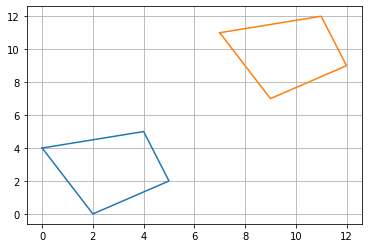

In [3]:
fig = plt.figure()
c = fig.add_subplot(1, 1, 1)

c.plot(points[:, 0], points[:, 1])
c.grid()

# Translate points
tr_points = points + transform
c.plot(tr_points[:, 0], tr_points[:, 1])

fig.savefig('ex1.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=300, )

Упражнение2 

Задание:  

Нарисовать произвольный многоугольник. Выполнить над ним следующие преобразования:
 - повороты вокруг указанной произвольной точки на заданный угол;
 - поворот вокруг центра масс;
 - сдвиги по указанному направлению (вектору);
 - отражение относительно биссектрисы первой четверти декартовой системы координат.  


На рисунке должен отображаться центр масс многоугольника, его вершины и углы поворота.


In [4]:
# Functions

def xy_rotation(points, xy, rad=None, deg=None):
    if rad:
        angle = rad
    elif deg:
        angle = deg * np.pi / 180
    else:
        print("Feed the angle in rad or deg!")
        return 1

    rot = np.array([[np.cos(angle), -np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]])
    xy = np.array(xy)
    print("Points are", points)
    print("Translated points are", points - xy) #-xy потому что сначала нужно сместить центр координат
    rotated_points = (points - xy) @ rot 
    rotated_points += xy #возвращаемся в наш центр 

    return rotated_points

def center_rotation(points, rad=None, deg=None):
    if rad:
        angle = rad
    elif deg:
        angle = deg * np.pi / 180
    else:
        print("Feed the angle in rad or deg!")
        return 1

    # Take the average over all x, and the average over all y to find the center.
    # The last element is the first element -> do not consider it.
    x = np.mean(points[:-1, 0])
    y = np.mean(points[:-1, 1])

    xy = np.c_[x, y]
    rotated_points = xy_rotation(points, xy, angle)

    return rotated_points

def vector_transl(points, vec, xy_transl):
    transl = vec * xy_transl
    points = points + transl
    return points

def bisector_mirror(points):
    mir = np.array( [[0, 1],
                     [1, 0]] )
    return points @ mir

In [5]:
def test1():
    # test for xy_rotation()
    points = np.array([[ 0, -3],
                 [2,-3],
                 [4,-1],
                 [3,2],
                 [1,0],
                 [-1,2],
                 [-2,-1],
                 [0, -3]])

    xy = np.array([3, 3])

    fig = plt.figure(figsize=(10,10), num=1)
    c1 = fig.add_subplot(1, 2, 1)
    c1.grid()
    c1.set_aspect('equal')
    c1.set_xlim(-15, 15)
    c1.set_ylim(-15, 15)

    # Plot origin polygon
    c1.plot( points[:, 0], points[:, 1], label="Origin points" )
    # Plot it's center
    x_center = np.mean(points[:-1, 0])
    y_center = np.mean(points[:-1, 1])
    c1.plot( x_center, y_center, 'bo', label="The center of the origin" )
    # Plot the xy point (rotation point)
    c1.plot( xy[0], xy[1], 'go', label="xy point" )
    c1.legend()


    c2 = fig.add_subplot(1, 2, 2)
    c2.grid()
    c2.set_aspect('equal')
    c2.set_xlim(-15, 15)
    c2.set_ylim(-15, 15)
    rot_points = xy_rotation(points, xy, deg=45)

    c2.plot( rot_points[:, 0], rot_points[:, 1], label='Rotated points' )
    x_rot_center = np.mean(rot_points[:-1, 0])
    y_rot_center = np.mean(rot_points[:-1, 1])
    # Visualize the angle.
    c2.plot( [xy[0], x_center], [xy[1], y_center], color='orange', marker='o' )
    c2.plot( [xy[0], x_rot_center], [xy[1], y_rot_center], color='orange', marker='o' )

    c2.legend()

    fig.savefig("test1.pdf", dpi=300, format="pdf")


def test2():
    points = np.array([[ 0, -3],
                 [2,-3],
                 [4,-1],
                 [3,2],
                 [1,0],
                 [-1,2],
                 [-2,-1],
                 [0, -3]])
    points += 5

    fig = plt.figure(figsize=(10,10))
    c1 = fig.add_subplot(1, 2, 1)
    c1.grid()
    c1.set_aspect('equal')
    c1.set_xlim(-10, 10)
    c1.set_ylim(-10, 10)
    c1.xaxis.set_minor_locator(MultipleLocator(1))
    c1.plot(points[:, 0], points[:, 1], label="Origin points")
    c1.legend()

    c2 = fig.add_subplot(1, 2, 2)
    c2.grid()
    c2.set_aspect('equal')
    c2.set_xlim(-10, 10)
    c2.set_ylim(-10, 10)
    c2.xaxis.set_minor_locator(MultipleLocator(1))
    rot_points = center_rotation(points, deg=90)
    c2.plot(rot_points[:, 0], rot_points[:, 1], label='Rotated points')
    c2.legend()

    fig.savefig("test2.pdf", dpi=300, format="pdf")


def test3():
    points = np.array([[ 0, -3],
                 [2,-3],
                 [4,-1],
                 [3,2],
                 [1,0],
                 [-1,2],
                 [-2,-1],
                 [0, -3]])
    
    # Last point is repeating the start point, so we do not take it in consideration.
    origin_center = np.array( [np.mean(points[:-1, 0]), np.mean(points[:-1, 1])] )
    fig = plt.figure(figsize=(10,10))
    c1 = fig.add_subplot(1, 2, 1)
    c1.grid()
    c1.set_aspect('equal')
    c1.set_xlim(-10, 10)
    c1.set_ylim(-10, 10)

    c1.xaxis.set_minor_locator(MultipleLocator(1))
    c1.xaxis.set_major_locator(MultipleLocator(1))
    c1.yaxis.set_minor_locator(MultipleLocator(1))
    c1.yaxis.set_major_locator(MultipleLocator(1))

    c1.plot(points[:, 0], points[:, 1], label="Origin points")
    c1.plot(origin_center[0], origin_center[1], 'go')
    c1.legend()

    c2 = fig.add_subplot(1, 2, 2)
    c2.grid()
    c2.set_aspect('equal')
    c2.set_xlim(-10, 10)
    c2.set_ylim(-10, 10)

    c2.xaxis.set_major_locator(MultipleLocator(1))
    c2.yaxis.set_major_locator(MultipleLocator(1))

    transl_points = vector_transl( points, np.array([1, 1]), np.array([4, 5]) )

    c2.plot(transl_points[:, 0], transl_points[:, 1], label='Translated points')
    # Last point is repeating the start point, so we do not take it in consideration.
    transl_center = np.array( [np.mean(transl_points[:-1, 0]), np.mean(transl_points[:-1, 1])] )
    c2.plot( [origin_center[0], transl_center[0]], [origin_center[1], transl_center[1]] )
    c2.plot( [origin_center[0], transl_center[0]], [origin_center[1], transl_center[1]], 'go' )
    c2.legend()

    fig.savefig("test3.pdf", dpi=250, format="pdf")

def test4():
    points = np.array([[ 0, -3],
                 [2,-3],
                 [4,-1],
                 [3,2],
                 [1,0],
                 [-1,2],
                 [-2,-1],
                 [0, -3]])
    points[:, 0] += 10

    bpoints = bisector_mirror(points)

    fig = plt.figure(figsize=(10,10))
    c1 = fig.add_subplot(1, 1, 1)
    c1.grid()
    c1.set_aspect('equal')

    c1.xaxis.set_major_locator(MultipleLocator(1))
    c1.yaxis.set_major_locator(MultipleLocator(1))

    c1.plot(points[:, 0], points[:, 1], label="Origin points")
    c1.plot(bpoints[:, 0], bpoints[:, 1], label='Bisector points')

    conduct = np.zeros( (points.shape[0] * 2, 2) )
    conduct[::2, :] = points
    conduct[1::2, :] = bpoints

    for i in range(0, conduct.shape[0] - 1, 2):
        c1.plot([conduct[i, 0], conduct[i+1, 0]], [conduct[i, 1], conduct[i+1, 1]], label='Mirror', lw=.5, marker='o')
    c1.axline([0, 0], [1, 1])
    c1.legend()

    fig.savefig("test4.pdf", dpi=250, format="pdf")

Points are [[ 0 -3]
 [ 2 -3]
 [ 4 -1]
 [ 3  2]
 [ 1  0]
 [-1  2]
 [-2 -1]
 [ 0 -3]]
Translated points are [[-3 -6]
 [-1 -6]
 [ 1 -4]
 [ 0 -1]
 [-2 -3]
 [-4 -1]
 [-5 -4]
 [-3 -6]]


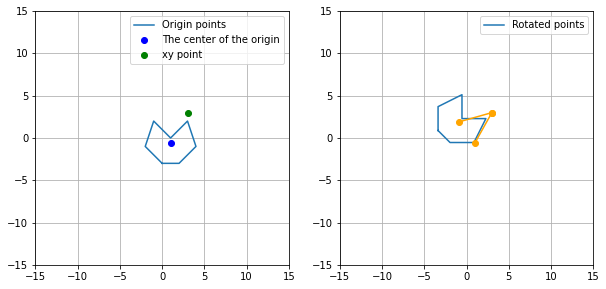

In [6]:
test1()

Points are [[5 2]
 [7 2]
 [9 4]
 [8 7]
 [6 5]
 [4 7]
 [3 4]
 [5 2]]
Translated points are [[-1.         -2.42857143]
 [ 1.         -2.42857143]
 [ 3.         -0.42857143]
 [ 2.          2.57142857]
 [ 0.          0.57142857]
 [-2.          2.57142857]
 [-3.         -0.42857143]
 [-1.         -2.42857143]]


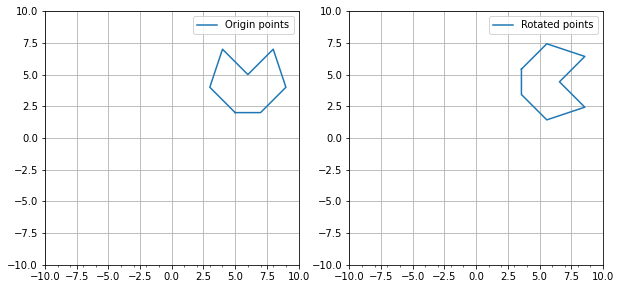

In [7]:
test2()

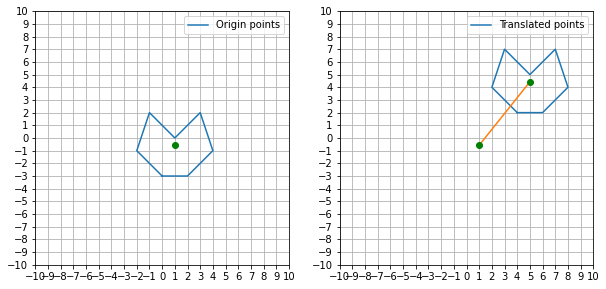

In [8]:
test3()

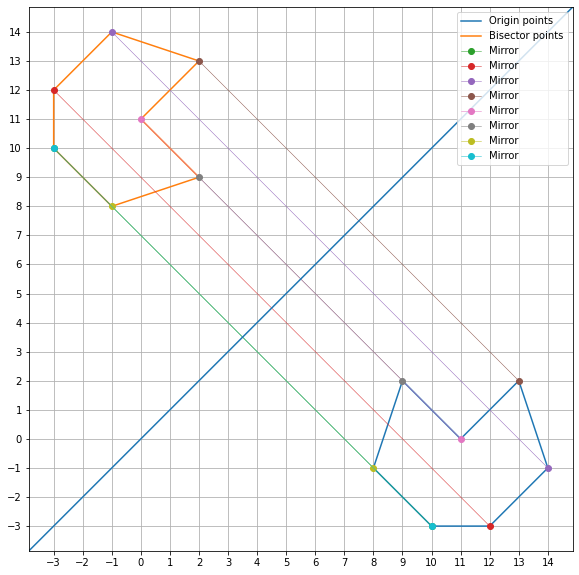

In [9]:
test4()


Упражнение 3 

Задание:

Повторите как можно более точно пример из презентации, изображенный на рисунке 6. Угол
поворота можете взять произвольный. Дуги окружности, по которым происходит поворот можно
изобразить без стрелок.


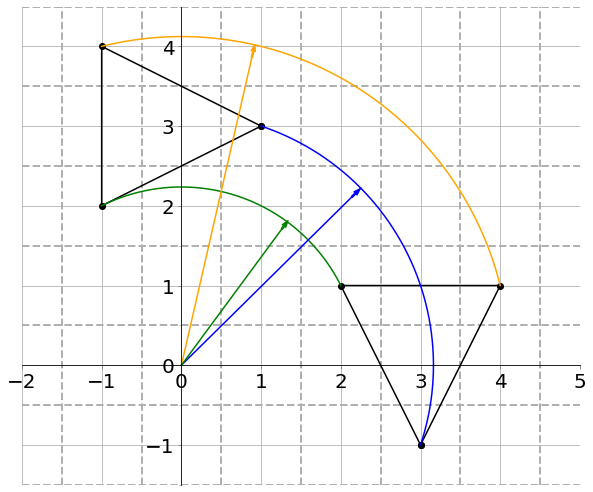

In [10]:
points = np.array([ [3, -1], [4, 1], [2, 1], [3, -1] ])
angle = np.pi / 2
rot = np.array([ [np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)] ])
rot_points = points @ rot
# Radius
r1 = np.hypot(points[0][0], points[0][1])
r2 = np.hypot(points[1][0], points[1][1])
r3 = np.hypot(points[2][0], points[2][1])

# Angles. Taking the cos.
a1_start = np.arccos( points[0][0] / r1 )
a2_start = np.arccos( points[1][0] / r2 )
a3_start = np.arccos( points[2][0] / r3 )

a1_finish = np.arccos( rot_points[0][0] / r1 )
a2_finish = np.arccos( rot_points[1][0] / r2 )
a3_finish = np.arccos( rot_points[2][0] / r3 )

# The degree that we found for a1_start is positive, but on our graph it's negative.
range1 = np.linspace(-a1_start, a1_finish, 1000)
range2 = np.linspace(a2_start, a2_finish, 1000)
range3 = np.linspace(a3_start, a3_finish, 1000)

x1 = r1 * np.cos(range1)
y1 = r1 * np.sin(range1)
x2 = r2 * np.cos(range2)
y2 = r2 * np.sin(range2)
x3 = r3 * np.cos(range3)
y3 = r3 * np.sin(range3)

fig = plt.figure( figsize=(10, 10) )
c = fig.add_subplot(1, 1, 1)

c.xaxis.set_minor_locator(MultipleLocator(.5))
c.yaxis.set_minor_locator(MultipleLocator(.5))
c.xaxis.set_major_locator(MultipleLocator(1))
c.yaxis.set_major_locator(MultipleLocator(1))
c.tick_params(which="both", color="grey", labelsize="20")

c.set_ylim(-1.5, 4.5)
c.set_xlim(-2, 5)

c.set_aspect('equal')
c.grid()
c.grid(which="minor", linestyle = "--", lw=2)

c.spines['top'].set_color('none')
c.spines['bottom'].set_position('zero')
c.spines['left'].set_position('zero')
c.spines['right'].set_color('none')

c.plot(points[:, 0], points[:, 1], marker="o", color="black")
c.plot(rot_points[:, 0], rot_points[:, 1], marker="o", color="black")
c.plot(x1, y1, color="blue")
c.plot(x2, y2, color="orange")
c.plot(x3, y3, color="green")

c.plot([0, x1[700]], [0, y1[700]], color="blue")
c.arrow(x1[700] - x1[700]*0.05, y1[700] - y1[700]*0.05, x1[700]*0.02, y1[700]*0.02, width=0.02, color="blue")

c.plot([0, x2[700]], [0, y2[700]], color="orange")
c.arrow(x2[700] - x2[700]*0.04, y2[700] - y2[700]*0.04, x2[700]*0.02, y2[700]*0.02, width=0.02, color="orange")

c.plot([0, x3[300]], [0, y3[300]], color="green")
c.arrow(x3[300] - x3[300]*0.05, y3[300] - y3[300]*0.05, x3[300]*0.02, y3[300]*0.02, width=0.02, color="green")

fig.savefig("ex3.pdf", dpi=350, format="pdf")